In [38]:
import pandas as pd
import seaborn as sns
import numpy as np
# Librerías de modelado
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression


In [28]:
# Matplotlib inline para visualizar los gráficos de Matplotlib
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
# Configuración para setear y que todas las fig de Seaborn salgan por defecto con este tamaño
# Se puede especificar el tamaño de cada figura
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [23]:
X = [17,51,27,21,36,48,19,26,54,30]
Y = [10,1,5,9,4,2,9,6,0,3]


student_data = pd.DataFrame(X,Y).reset_index()


nombres = {"index":"Tardies", 0: "Age"}

In [24]:
student_data.rename(columns = nombres,inplace=True)
student_data

,Tardies,Age
0,10,17
1,1,51
2,5,27
3,9,21
4,4,36
5,2,48
6,9,19
7,6,26
8,0,54
9,3,30


Draw a dispersion diagram (scatter plot) for the data.

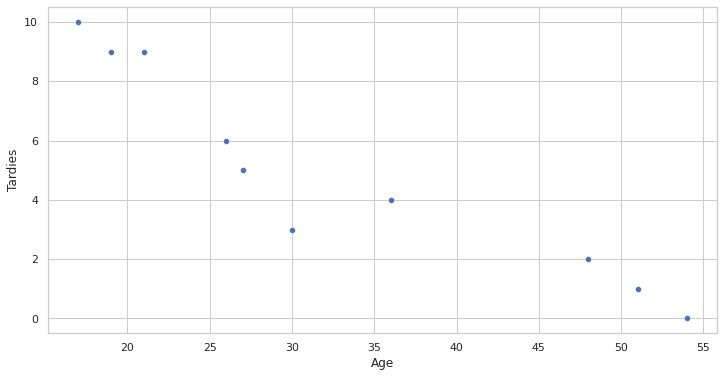

In [30]:
# Your code here.
sns.scatterplot(x="Age", y="Tardies", data=student_data);

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
# Your response here. 
We can see a tren, younger people come later

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [33]:
# Your response here.
#covarianza
student_data.cov()

,Tardies,Age
Tardies,12.544444,-45.566667
Age,-45.566667,187.655556


In [34]:
student_data.corr()

,Tardies,Age
Tardies,1.000000,-0.939163
Age,-0.939163,1.000000


La correlación, siendo un parámetro que va del 0 al 1, y estar cercano al -1 quiere decir que ambas varuables están muy relacionadas de manera inversa. 

La covarianza explica si se mueven o no en la misma direccion

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [39]:
# Your response here.
lr = LinearRegression()

In [44]:
lr.fit(
    X = student_data[["Age"]], #siempre es un dataframe por eso pongo doble corchete
    y = student_data.Tardies #es una serie de pandas
)

LinearRegression()

In [45]:
beta_1 = lr.coef_[0]
beta_0 = lr.intercept_
print(beta_0, beta_1)

12.888803363135768 -0.2428207709159808


In [46]:
student_data["predicción"] = (student_data.Age * lr.coef_[0]) + lr.intercept_
student_data

,Tardies,Age,predicción
0,10,17,8.760850
1,1,51,0.504944
2,5,27,6.332643
3,9,21,7.789567
4,4,36,4.147256
5,2,48,1.233406
6,9,19,8.275209
7,6,26,6.575463
8,0,54,-0.223518
9,3,30,5.604180


Plot your regression model on your scatter plot.

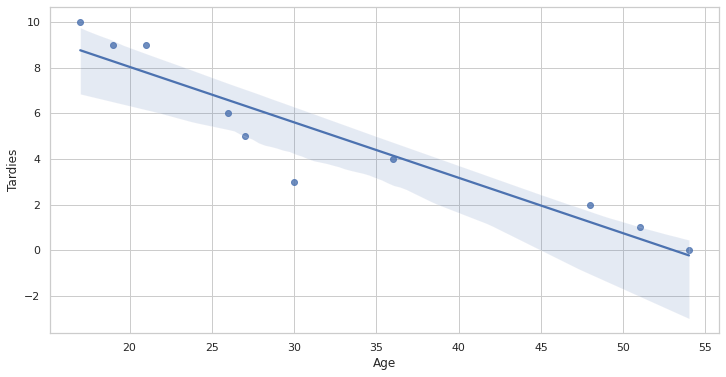

In [48]:
# Your code here.
sns.regplot(x="Age", y="Tardies", data=student_data);

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [52]:
# Your response here. 
results = smf.ols("Tardies ~ Age", data = student_data).fit()
results.summary()

/home/mariadelas/anaconda3/envs/ironhack/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           5.57e-05
Time:                        16:49:28   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
#P es cero lo cual implica que podemos tener en cuenta estos datos. Además los coeficientes también nos dan información de la relación entre variables


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [88]:
# Import any libraries you may need & the data
#goal is CO2 emissions
vehicles = pd.read_csv("vehicles.csv")

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [89]:
# Your response here. 
vehicles = vehicles.drop(['Make', 'Model', 'Engine Displacement','Transmission', 'Drivetrain', 'Vehicle Class','Fuel Type','City MPG','Highway MPG'], axis=1)


#### Your response here. 

esta es la que está más relacionada Fuel Barrels/Year

In [90]:
vehicles.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.082469,-0.221084,0.204751,-0.222300,-0.091913
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.752393,0.778153
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.986189,0.916208
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,1.000000,0.930865
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,0.930865,1.000000


In [92]:
renombrar = {"Fuel Barrels/Year": "Fuel_Barrels_Year", "Fuel Cost/Year":"Fuel_Cost_Year","CO2 Emission Grams/Mile":"CO2_Emission_Grams_Mile" }
vehicles.rename(columns=renombrar, inplace=True)

In [99]:
lr.fit(
    X = vehicles[["CO2_Emission_Grams_Mile"]], #siempre es un dataframe por eso pongo doble corchete
    y = vehicles["Fuel_Barrels_Year"] #es una serie de pandas
)

LinearRegression()

In [102]:
results = smf.ols("CO2_Emission_Grams_Mile ~ Fuel_Barrels_Year", data = vehicles).fit()
results.summary()
#que el r2 sea igual al r2 ajustado quiere decir que todo lo que está en el dataframe cuenta.

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2_Emission_Grams_Mile   R-squared:                       0.973
Model:                                 OLS   Adj. R-squared:                  0.973
Method:                      Least Squares   F-statistic:                 1.275e+06
Date:                     Tue, 23 Nov 2021   Prob (F-statistic):               0.00
Time:                             17:30:19   Log-Likelihood:            -1.5821e+05
No. Observations:                    35952   AIC:                         3.164e+05
Df Residuals:                        35950   BIC:                         3.164e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            12.4865      0.423     29.523      0.000      11.658      13.316
Fuel_Barrels_Year    26.2836      0.023   1128.967      0.000      26.238      26.329
==============================================================================
Omnibus:                    88540.411   Durbin-Watson:                   0.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        957228555.961
Skew:                          26.696   Prob(JB):                         0.00
Kurtosis:                     800.592   Cond. No.                         74.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
beta_1_irreal = lr.coef_[0]
beta_0_irreal = lr.intercept_

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

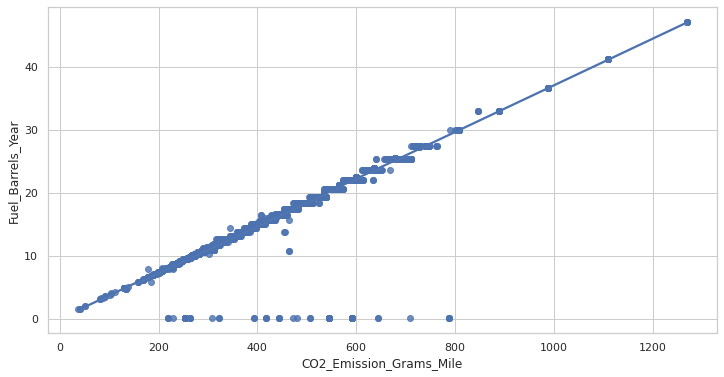

In [103]:
sns.regplot(x="CO2_Emission_Grams_Mile", y="Fuel_Barrels_Year", data=vehicles);

In [ ]:
# Your response here. 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [114]:
# Your code here. 
invitados = [1,3,4,6,8,9,11,14]
asistentes = [1,2,4,4,5,7,8,13]
fiesta = pd.DataFrame(invitados, asistentes).reset_index()

renombrar = {"index": "Asistentes", 0:"Invitados"}
fiesta.rename(columns=renombrar, inplace=True)
fiesta

,Asistentes,Invitados
0,1,1
1,2,3
2,4,4
3,4,6
4,5,8
5,7,9
6,8,11
7,13,14


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

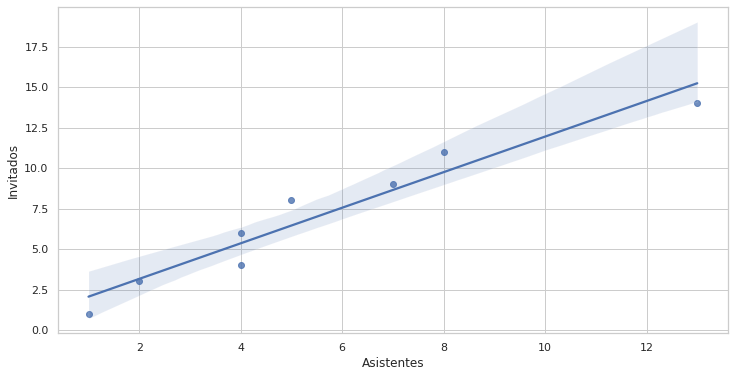

In [116]:
# Your code here.
sns.regplot(x="Asistentes", y="Invitados", data=fiesta);

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [117]:
# Your response here. 
results = smf.ols("Asistentes ~ Invitados", data = fiesta).fit()
results.summary()

/home/mariadelas/anaconda3/envs/ironhack/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Asistentes   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           0.000102
Time:                        17:52:12   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4394      0.759     -0.579      0.584      -2.297       1.418
Invitados      0.8485      0.094      9.045      0.000       0.619       1.078
==============================================================================
Omnibus:                        0.556   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.757   Jarque-Bera (JB):                0.514
Skew:                           0.261   Prob(JB):                        0.773
Kurtosis:                       1.873   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [ ]:
sns.boxplot(x="Age", data=titanic)

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 